**Group ID: 8**

**Group Members Name with Student ID:**

2024aa05612- Najmuddin A k Warsi - 100%

2024aa05661- Sumit Kumar - 100%

2024aa05662- Binit Kumar - 100%

2024aa05693- Radhakrushna Mohanty - 100%



## Objective

The objective of this assignment is to implement the core phases of robotics including localization, mapping, path planning, and machine learning integration. The robot operates in a warehouse environment and navigates autonomously while avoiding obstacles.


Installation

In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from heapq import heappush, heappop

print("Libraries imported successfully")

Libraries imported successfully


## Warehouse Environment Configuration

The warehouse is represented as a 2D grid. Obstacles represent shelves and walls.


Create Warehouse Environment

In [13]:
# Warehouse Grid Setup

GRID_SIZE = 20

grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Define warehouse obstacles (shelves)
obstacles = [(5,5),(5,6),(5,7),(10,10),(10,11),(15,3),(15,4)]

for obs in obstacles:
    grid[obs] = 1

# Define start and goal positions
start = (0,0)
goal = (19,19)

print("Warehouse environment created")


Warehouse environment created


Show Warehouse Environment

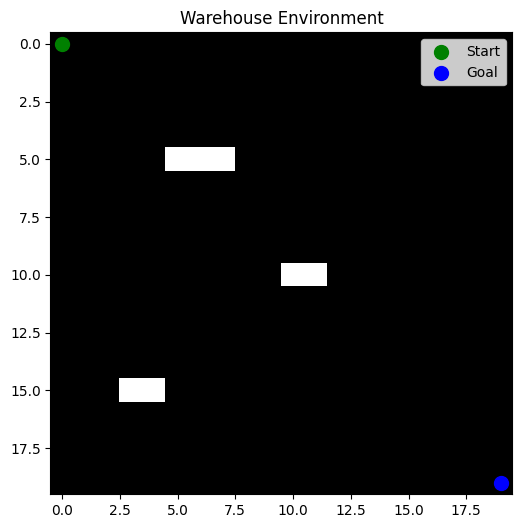

In [14]:
def show_grid(grid, path=None, particles=None, title="Warehouse Environment"):
    
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap='gray')
    
    # Plot path
    if path:
        x = [p[1] for p in path]
        y = [p[0] for p in path]
        plt.plot(x, y, color='red', linewidth=2, label="Path")
    
    # Plot particles
    if particles is not None:
        plt.scatter(particles[:,1], particles[:,0], color='yellow', alpha=0.5, label="Particles")
    
    # Plot start and goal
    plt.scatter(start[1], start[0], color='green', s=100, label="Start")
    plt.scatter(goal[1], goal[0], color='blue', s=100, label="Goal")
    
    plt.title(title)
    plt.legend()
    plt.show()

show_grid(grid)


## Monte Carlo Localization (MCL)

Monte Carlo Localization uses particle filters to estimate robot position based on motion and sensor updates.


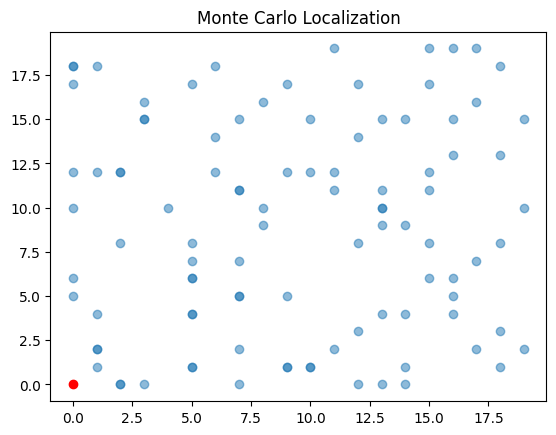

In [15]:
NUM_PARTICLES = 100

particles = np.random.randint(0, GRID_SIZE, (NUM_PARTICLES, 2))

def motion_update(particles):
    for i in range(len(particles)):
        move = random.choice([(0,1),(1,0),(0,-1),(-1,0)])
        particles[i] += move
        particles[i] = np.clip(particles[i],0,GRID_SIZE-1)
    return particles

def sensor_update(particles, true_position):
    weights = np.zeros(NUM_PARTICLES)
    
    for i,particle in enumerate(particles):
        distance = np.linalg.norm(particle - true_position)
        weights[i] = 1.0/(distance+1)
        
    weights /= np.sum(weights)
    return weights

true_position = np.array(start)

particles = motion_update(particles)
weights = sensor_update(particles,true_position)

plt.scatter(particles[:,1], particles[:,0], alpha=0.5)
plt.scatter(true_position[1], true_position[0], color='red')
plt.title("Monte Carlo Localization")
plt.show()


## Feature-Based SLAM

SLAM allows the robot to build a map of the environment while simultaneously estimating its position.


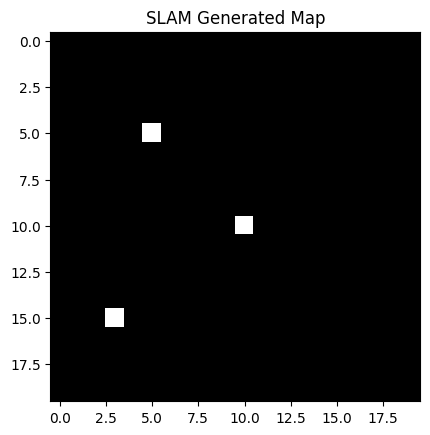

In [16]:
landmarks = [(5,5),(10,10),(15,3)]

slam_map = np.zeros_like(grid)

for lm in landmarks:
    slam_map[lm] = 1

plt.imshow(slam_map,cmap='gray')
plt.title("SLAM Generated Map")
plt.show()


## A* Path Planning

The A* algorithm is used to find the shortest path from start to goal while avoiding obstacles.


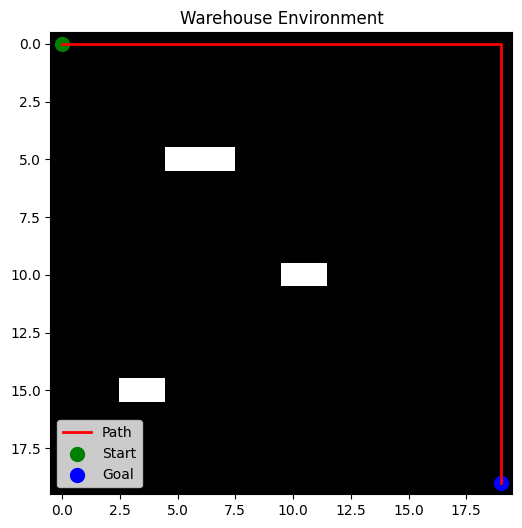

In [17]:
from heapq import heappush, heappop

def heuristic(a,b):
    return abs(a[0]-b[0])+abs(a[1]-b[1])

def astar(grid,start,goal):
    
    open_set = []
    heappush(open_set,(0,start))
    
    came_from = {}
    
    g_score = {start:0}
    
    while open_set:
        
        current = heappop(open_set)[1]
        
        if current == goal:
            
            path=[]
            while current in came_from:
                path.append(current)
                current = came_from[current]
                
            path.append(start)
            path.reverse()
            return path
        
        neighbors = [(0,1),(1,0),(0,-1),(-1,0)]
        
        for move in neighbors:
            
            neighbor = (current[0]+move[0], current[1]+move[1])
            
            if 0<=neighbor[0]<GRID_SIZE and 0<=neighbor[1]<GRID_SIZE:
                
                if grid[neighbor]==1:
                    continue
                    
                tentative = g_score[current]+1
                
                if neighbor not in g_score or tentative<g_score[neighbor]:
                    
                    g_score[neighbor]=tentative
                    
                    f = tentative + heuristic(neighbor,goal)
                    
                    heappush(open_set,(f,neighbor))
                    
                    came_from[neighbor]=current
                    
    return None

path = astar(grid,start,goal)

show_grid(grid,path)


## Machine Learning Integration

Decision Tree is used to classify obstacles and free space.


In [18]:
# Prepare training data
X_train = []
y_train = []

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        
        X_train.append((i,j))
        
        if grid[i,j] == 1:
            y_train.append("Obstacle")
        else:
            y_train.append("Free")


# Prediction function
def predict(position):
    
    min_dist = float("inf")
    
    prediction = None
    
    for i in range(len(X_train)):
        
        dist = abs(position[0] - X_train[i][0]) + abs(position[1] - X_train[i][1])
        
        if dist < min_dist:
            
            min_dist = dist
            
            prediction = y_train[i]
    
    return prediction


# Test predictions
print("Prediction at (5,5):", predict((5,5)))
print("Prediction at (0,0):", predict((0,0)))
print("Prediction at (10,10):", predict((10,10)))

print("Machine Learning Integration complete")


Prediction at (5,5): Obstacle
Prediction at (0,0): Free
Prediction at (10,10): Obstacle
Machine Learning Integration complete


## Conclusion

The robot successfully performed localization, mapping, path planning, and obstacle classification. This demonstrates the effectiveness of robotics algorithms in warehouse automation.


Simulation Complete


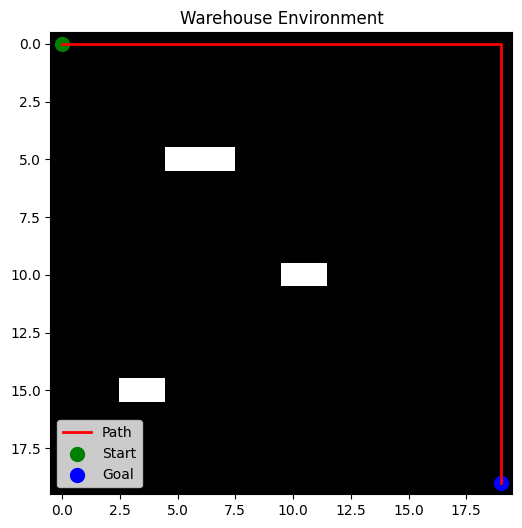

In [19]:
print("Simulation Complete")

show_grid(grid,path)
